**AGENT-BASED ARTIFICIAL INTELLIGENCE, POLIBA, A.Y. 2023/2024**

**Solving Problems by Searching**

List of Contributors:
- Tommaso Di Noia
- Alberto Carlo Maria Mancino
- Vincenzo Paparella


**Problem-Solving Agent.**

We aim to design an agent that is capable of reaching a goal state starting from an initial state. For instance, we desire to reach Bari starting from Ruvo.

Let's see how to proceed step-by-step.

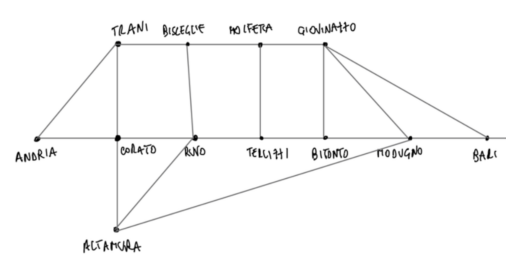

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('sample_data/map.png')
plt.imshow(img)
plt.axis('off')
plt.show()


### Modeling the environment






Firstly, we should model the map above in such a way our machine can understand it by preserving the connections among the cities.

In other words, we should implement this map through a data structure in Python.

A dictionary is a good candidate for this objective. Indeed, for each key representing a city, the values will be the lists containing the cities that we can reach from the key (i.e., from a given city).

In [62]:
roads_small= {
    'Andria': ['Corato', 'Trani'],
    'Corato': ['Ruvo', 'Trani', 'Andria', 'Altamura'],
    'Altamura': ['Corato', 'Ruvo', 'Modugno'],
    'Ruvo': ['Corato', 'Bisceglie', 'Terlizzi', 'Altamura'],
    'Terlizzi': ['Ruvo', 'Molfetta', 'Bitonto'],
    'Bisceglie': ['Trani', 'Ruvo', 'Molfetta'],
    'Trani': ['Andria', 'Corato', 'Bisceglie'],
    'Molfetta': ['Bisceglie', 'Giovinazzo', 'Terlizzi'],
    'Giovinazzo': ['Molfetta', 'Modugno', 'Bari', 'Bitonto'],
    'Bitonto': [ 'Modugno', 'Giovinazzo', 'Terlizzi'],
    'Modugno': ['Bitonto', 'Giovinazzo', 'Bari', 'Altamura'],
    'Bari': ['Modugno', 'Giovinazzo']
}

## Problem solving-Agent

Generally, an agent can follow this four-phase problem-solving process:
1. **Goal formulation**: the goal that the agent aims to reach. For instance, our agent would reach the city "Bari" in the previous map;
2. **Problem formulation**: the agent designs a description of the states and actions necessary to reach the goal. In the previous example, a state is the city in which the agent is located, while an action consists in moving from a city to an adjacent one.
3. **Search**: the agent simulates sequences of actions in its model. This sequence of actions during the searching phase is guided by a chosen **strategy** (e.g., Breadth-first search). The agent continues searching until it finds a sequence of actions that reaches the goal. Such sequence is called **soution**.
4. **Execution** The agent can now execute the actions in the solution and reach the goal.

Since the goal formulation is trivial, we start from the Problem formulation by exploiting the Map problem.

### Problem formulation

Formulating the problem practically means modeling the agent. Generally, it is formally defined as follows:
* A set of possible **states** of the environment in which the agent can be, the **state space**;
* The **initial state** that the agent starts in, i.e.;
* The **goal state** (or a set of them);
* The **actions** available to the agent;
* A **transition model** which describes what each action does;
* An **action cost function** that gives a numeric cost of applying an action in a specific state to reach another state.

It is practically convenient to implement the Problem formulation with a  "**Problem**" Class. But, how?

We observe that the **state space**, the **initial state**, and the **goal state** are fixed when an object of the Problem class is instantiated. Then, they can easily be attributes of the class that are initialized within the constructor of the class.

In contrast, the remaining characteristics of the problem formulation can vary according to the state in which the agent is, or the action it takes. Specifically:
* the **actions** available to the agents can be retrieved by an _Actions(s)_ function that, given a state _s_ returns a finite set of actions that can be executed in _s_;
* the **transition model** can be retrieved by a _Results(s,a)_ function that returns the state that results from doing action _a_ in the state _s_;
* the **action cost function** can be _Action-Cost(s,a,s') that gives the numeric cost of applying action _a_ in state _s_ to reach state _s'_.

The Problem class can be generally implemented as described above. However, this is just a matter of implementation. For instance, one problem may need other functions or attributes.



Let's apply what we have observed to our Map problem.

We create a StreetProblem Class.

Within the costructor, we initialize the _initial_state_, the _goal_state_, and the _state space_. These variables will be specified in input to the created StreetProblem object.

We implement the _actions_ function. Given a state in input to this function, it returns the list of possible actions. Note that the loaded environment is very simplified. Indeed, here the actions have the same name of the reached state. For this reason, we return the value (i.e. the list of actions) of a given key (i.e., a state) of the environment dictionary. As an example, if the state is 'Ruvo' (key within the environment dictionary, the returned actions will be ['Corato', 'Bisceglie', 'Terlizzi', 'Altamura'] (the value of the 'Ruvo' key in the dictionary). Alternative actions could be for instance 'Andria': ['Go to Corato', 'Go to Trani']. In this case, we would have the need of implementing a sort of mapping between the action 'Go to Corato' and the state reached by this action (i.e., Corato).

We implement the _results_ function. Given a state and an action in input, it returns the reached state by performing that action from that state. For the same reason above, we return the action name, as in this very simple environment the actions have the same name of the reached state.

We implement the _cost_ function. Given a state and an action, it returns the cost of the action from that state. As far as now, we do not need particular implementations of this function. Then, we just return 1.

Additionally, we implement two functions. These functions are useful from an implementation point of view beyond theory:
* _goal_test_ function checks if the _goal_state_ has been reached. In this case it returns True, False otherwise.
* _successors_ function returns the reachable states from a state with the respective actions. This function will be useful when dealing with the search phase.

In [63]:
class StreetProblem:

    def __init__(self, initial_state, goal_state, environment):
        self.initial_state = initial_state #  the initial state of the agent
        self.goal_state = goal_state #  the goal state of the agent
        self.environment = environment # the state space

    def successors(self, state):
        """
        Given a state returns the reachable states with the respective actions
        :param state: actual state
        :return: list of successor states and actions
        """
        possible_actions = self.actions(state)
        return [(self.result(state, a), a) for a in possible_actions]

    def actions(self, state):
        """
        Given a state returns the list of possible actions
        :param state: actual state
        :return: a list of actions
        """
        return self.environment[state]

    def result(self, state=None, action=None):
        """
        Given a state and an action returns the reached state
        :param state: actual state
        :param action: chosen action
        :return: reached state
        """
        return action

    def goal_test(self, state):
        """
        Checks if the goal condition has been reached
        :param state: actual state
        :return: True if the goal condition is matched, False otherwise
        """
        return state == self.goal_state

    def cost(self, state, action):
        """
        Given a state and an action returns the cost of the action
        :param state: a state
        :param action: an action
        :return: the cost of doing that action in that state
        """
        return 1

WOW! We have formulated our first (simple) problem. Let's play a bit with it.

In [64]:
initial_state = None # we are not interested in it right now
goal_state = 'Ruvo'

# we initialize a StreetProblem object
map_problem = StreetProblem(environment=roads_small, initial_state=initial_state, goal_state=goal_state)

print(f'Actions function test: {map_problem.actions("Terlizzi")}')
print(f'Successors function test: {map_problem.successors("Terlizzi")}')
print(f'Result function test: {map_problem.result("Terlizzi", "Molfetta")}')
print(f'Goal test function test: {map_problem.goal_test("Terlizzi")}')

Actions function test: ['Ruvo', 'Molfetta', 'Bitonto']
Successors function test: [('Ruvo', 'Ruvo'), ('Molfetta', 'Molfetta'), ('Bitonto', 'Bitonto')]
Result function test: Molfetta
Goal test function test: False


After formulating the problem, the next step of our problem-solving process is the **search** phase.

### Search

In the **search** phase, the agent simulates sequences of actions guided by a chosen **strategy** until it finds a sequence of actions that reaches the goal. Such sequence is called **solution**.

Generally, a **search algorithm** takes a _search problem_ as input and returns a solution (or an indication of failure if a solution is not found).

To solve the search problem, we now consider the **tree search** idea. Here, we simulate the exploration of the state space by generating successors of already-explored states. Thus, we search the goal state along a tree. In this search tree:
- each **node** corresponds to a state in the state space (please, observe we used the verb "to correspond", not "to be");
- each edge correspond to an action.

Within this search tree, the root node is the initial state. Then, we can **expand** the node, by considering the available actions for that state and the result of computing that action, i.e., the state in which that action leads to. In this way, we say that we generate a **child node** from a **parent node**. For instance, starting from 'Andria', we can go to 'Corato' and 'Trani'. 'Andria' is the parent node, while 'Corato' and 'Trani' are the children nodes.

After expanding the root node, we obtain a set of unexpanded nodes. This set is called **fringe** or **frontier**. From this frontier, we must choose the node we intend to expand. We choose this node according to a given strategy.

From this theory, we have understood that we have three main "actors" at this point:
- a node in the tree
- the frontier of the tree
- the tree search algorithm

Then, we need to understand how to implement these "actors".

#### Frontier's implementation

We start from the frontier, as it is the simplest.

We need a data structure to store the frontier. The operations that we will need to perform on the frontier are:
- check if it is empty;
- pop a node, i.e., remove the top node from the frontier and return it;
- add a node, i.e., insert a node within the frontier.

All these operations can be simply performed on a list in Python. Then, we just treat the fringe as a list.

THAT'S ALL, WONDERFUL!

#### Node's implementation

For what concern a node, we are not so lucky as in the previous case. Indeed a node in the three is represented by a data structure with five components:
- a **state**: the state to which the node corresponds;
- its **parent**: the node in the tree that generated this node;
- the **action**: the action that was applied to the parent's state to generate this node;
- the **path-cost**: the total cost of the path from the initial state to this node;
- the **depth**: the depth of the node within the graph.

It is easy to understand that we can implement this data structure with a Node Class in Python, where the previous five components are attributes of this class.

Let's build this class.

Within the costructor, we initialize the _state_, the _parent_, the _action_, the _cost_, and the _depth_. These variables will be specified in input to the created Node object.

Then, we implement some other functions.

Firstly, to build the tree and perform the search phase along it, at a certain point we will need to expand a node (if it is possible). Therefore, we create the _expand_ function that returns a Node. We observe that this function takes in input the new state (that will be the state corresponding to the created node), the action that led to this new state, the cost of the path until the previous node. Please, note that this function returns a single node. However, one parent node may have more children nodes (i.e., it can allow more possible actions to perform by potentially reaching several states). As a consequence, we will have to manage this possibility elsewhere.

Secondly, we implement the _path_ function. This function can help us to retrieve the path from the root node to the actual node. Therefore, it returns a list of actions. This function will be exploited if the current node corresponds to the goal state.

Finally, we implement the __repr__ function. This function is a built-in function in Python that stands for "representation". It just returns a representation for the node class when we print the node through the print() function.

In [65]:
class Node:
    def __init__(self, state, parent, action, cost, depth):
        self.state = state
        self.parent = parent
        self.action = action
        self.cost = cost
        self.depth = depth

    def __repr__(self):
        """
        A representation of the class. Useful with functions like print.
        :return: a string
        """
        return f'({self.state})'

    def expand(self, state, action, cost=1):
        """
        Given a new state returns a child tree node containing that state
        :param new_state: state that will be contained by the node
        :param action: action that led to the state
        :param cost: cost of the path of the previous node
        :return: a child node
        """
        return Node(state=state,
                    parent=self,  # here, we pass the current node itself
                    action=action,
                    cost=self.cost+cost,
                    depth=self.depth+1)

    def path(self):
        """
         Returns the path from the root node to the actual node
        :return: a list of actions
        """
        path = []
        node = self
        while node.parent: # until we have a parent -> until we do not reach the root node
            path.append(node.action) # save the action that led to the state corresponding to that node
            node = node.parent # we move to the parent node of the current node within the loop
        path = list(reversed(path)) # we reverse the list just for a matter of representation
        return path


Let's test this Node class!

In [66]:
# We initialize a root node. The corresponding state is Terlizzi.
# This node, as a root node, does not have a parent node and an action that led
# to it.

node = Node(state='Terlizzi', parent=None, action=None, cost=0, depth=0)
print(f'The node representation is: {node}')
print('We expand this node: ')
new_node = node.expand('Ruvo', 'Ruvo', 1)
print(new_node)
print('We expand the new node: ')
new_node_2 =  new_node.expand('Corato', 'Corato', 1)
print(new_node_2)
print('The path to reach this last node is: ')
print(new_node_2.path())

The node representation is: (Terlizzi)
We expand this node: 
(Ruvo)
We expand the new node: 
(Corato)
The path to reach this last node is: 
['Ruvo', 'Corato']


Now, we know how to implement the frontier and a node of the tree. We can move on to the tree search!

#### Tree search and Graph search implementations

Once we have understood how to implement the nodes and the frontier of the tree, we need to implement a Class that represents the simulation of the sequences of actions to reach the goal (i.e., the search phase). We remember that this simulated sequence of actions is guided by a certain strategy. Indeed, the strategy is responsible of picking a specific node from the frontier. Then, we will expand this node.



##### Random Strategy implementation



For the moment, we can just consider a Random strategy, i.e., a strategy that randomly selects a node from the fringe.

However, we can delineate how to generally implement a strategy.

We can implement a strategy with a class containing the following method:
- a _select_ function. This function receives in input the current fringe of the tree. According to the strategy, the function returns the next node to expand picking it from the fringe (if it is not the node containing the goal state).

A possible implementation of the Random strategy is below.

In [67]:
import random

class Random:

    def __repr__(self):
        return 'Random strategy'

    @staticmethod
    def select(fringe):
        random.shuffle(fringe)  # random strategy: just randomly shuffle the nodes within the frontier
        node = fringe.pop(0) # select the next node to expand
        return fringe, node

##### Tree Search implementation

Given a strategy, we can now implement the **tree search algorithm**. We recall that a tree search algorithm takes a search problem as input and returns a solution (or an indication of failure if a solution is not found).

We decide to implement this algorithm with a TreeSearch Class. We have two inputs for this class, i.e., the problem and the strategy.

We can initialize these variables within the contructor of the class.
Here, we also initialize the fringe of the tree as an empty list (we recall that we observed that we can implement the fringe as a list in Python).

Then, we implement a _run_ method of this class by running the algorithm. This algorithm follows these instricutions:

1. firstly, we initialize the root node. We can retrieve the state of this initial node from the problem class, where we have the problem initial state. Then, this node has no parent, action, cost, and depth.

2. Perform a search loop in which we:
* check if we have reached the goal state. We exploit the method implemented within the problem class;
* we expand the current node. Firstly, we find the reachable states from the current state along with the corresponding action. Then, we create several node objects for each reachable state. We exploit the expand method within the node class;
* we update the fringe e select the next node according to the strategy:
* check if the search fails. Indeed, if the fringe is empty, we are not able to find a solution unless the last node picked from the fringe corresponds to the goal state.

Below, you can find the implementation of the TreeSearch class.


In [68]:
class TreeSearch:
    """
    A class able to find a solution with a given search strategy
    """

    def __init__(self, problem, strategy=None):
        self.problem = problem
        self.strategy = strategy
        self.fringe = []

    def __repr__(self):
        return 'Tree Search'

    def run(self):
        """
        Run the search
        :return: a path or a failure
        """

        node = Node(state=self.problem.initial_state,
                    parent=None,
                    action=None,
                    cost=0,
                    depth=0)

        # search loop
        while True:
            # check if the node passes the goal test
            if self.problem.goal_test(node.state):
                return 'Ok', node

            # expand the node
            new_states = self.problem.successors(node.state)
            new_nodes = [node.expand(state=s,
                                     action=a,
                                     cost=1) for s, a in new_states]

            # update the fringe
            self.fringe = self.fringe + new_nodes

            # check if the search fails: empty fringe, unless the last node from the fringe contains the goal state
            # if the fringe is not empty, we pop the next node from the fringe according to the strategy
            if len(self.fringe) != 0:
                self.fringe, node = self.strategy.select(self.fringe)
                # check to manage if the fringe becomes empty within the strategy class (e.g., because of DepthLimited)
                if node is None:
                    return 'Fail', []
            else:
                if self.problem.goal_test(node.state):
                    return 'Ok', node
                else:
                    return 'Fail', []


##### Graph Search implementation

We have implemented the tree search algorithm. However, from the theory we know that, adopting a strategy like DepthFirst, we risk to encounter an infinite loop, since the DepthFirst is not complete. An improvement is to move from the Tree Search to Graph Search. Differently from the Tree Search, in the Graph Search we store the already visited states into a data structure in order to avoid to visit them again.

We store such states into a list in Python.

In the following, you can find the implementation of the GraphSearch class.

In [69]:
class GraphSearch:
    """
    A class able to find a solution with a given search strategy
    """

    def __init__(self, problem, strategy=None):
        self.problem = problem
        self.strategy = strategy
        self.fringe = []
        self.visited = []  # <- The list containing the visited states

    def __repr__(self):
        return 'Graph Search'

    def run(self):
        """
        Run the search
        :return: a path or a failure
        """

        node = Node(state=self.problem.initial_state,
                    parent=None,
                    action=None,
                    cost=0,
                    depth=0)

        # search loop
        while True:
            # check if the node passes the goal test
            if self.problem.goal_test(node.state):
                return 'Ok', node

            # add visited for the graph search
            self.visited.append(node.state)

            # expand the node
            new_states = self.problem.successors(node.state)
            new_nodes = [node.expand(state=s,
                                     action=a,
                                     cost=1) for s, a in new_states]

            # we retain the states not already visited!
            new_nodes = [n for n in new_nodes if n.state not in self.visited]
            self.fringe = [n for n in self.fringe if n.state not in self.visited]

            # update the fringe
            self.fringe = self.fringe + new_nodes

            # check if the search fails: empty fringe, unless the last node from the fringe contains the goal state
            # if the fringe is not empty, we pop the next node from the fringe according to the strategy
            if len(self.fringe) != 0:
                self.fringe, node = self.strategy.select(self.fringe)
                # check to manage if the fringe becomes empty within the strategy class (e.g., because of DepthLimited)
                if node is None:
                    return 'Fail', []
            else:
                if self.problem.goal_test(node.state):
                    return 'Ok', node
                else:
                    return 'Fail', []

#### Execution

Here we are! We have all the ingredients to search a solution for our search problem. Now, let's execute it.

Let's write the main of our program to find a solution for our program.

In [70]:
# model and load the environment
streets = {
    'Andria': ['Corato', 'Trani'],
    'Corato': ['Ruvo', 'Trani', 'Andria', 'Altamura'],
    'Altamura': ['Corato', 'Ruvo', 'Modugno'],
    'Ruvo': ['Corato', 'Bisceglie', 'Terlizzi', 'Altamura'],
    'Terlizzi': ['Ruvo', 'Molfetta', 'Bitonto'],
    'Bisceglie': ['Trani', 'Ruvo', 'Molfetta'],
    'Trani': ['Andria', 'Corato', 'Bisceglie'],
    'Molfetta': ['Bisceglie', 'Giovinazzo', 'Terlizzi'],
    'Giovinazzo': ['Molfetta', 'Modugno', 'Bari', 'Bitonto'],
    'Bitonto': [ 'Modugno', 'Giovinazzo', 'Terlizzi'],
    'Modugno': ['Bitonto', 'Giovinazzo', 'Bari', 'Altamura'],
    'Bari': ['Modugno', 'Giovinazzo']
}

# formulate the problem
initial_state = 'Ruvo'
goal_state = 'Bari'
map_problem = StreetProblem(environment=streets,
                      initial_state=initial_state,
                      goal_state=goal_state)

# search strategy (for the search tree, we do not include DepthFirst because it will cause infinite loop.
# You can try by yourself)
strategies = [Random()]

# search algorithm (Tree Search / Graph Search)
for strategy in strategies:
    search = TreeSearch(problem=map_problem, strategy=strategy)
    result, node = search.run()
    print(f'{strategy}, {search}')
    print(result)
    try:
        print(node.path())
        print(node.cost)
    except AttributeError:
        pass

print("---------")

strategies = [Random()]
for strategy in strategies:
    search = GraphSearch(problem=map_problem, strategy=strategy)
    result, node = search.run()
    print(f'{strategy}, {search}')
    print(result)
    try:
        print(node.path())
        print(node.cost)
    except AttributeError:
        pass



Random strategy, Tree Search
Ok
['Bisceglie', 'Molfetta', 'Giovinazzo', 'Bari']
4
---------
Random strategy, Graph Search
Ok
['Terlizzi', 'Bitonto', 'Giovinazzo', 'Bari']
4


The Tree Search and Graph Search algorithms that we have implemented are agnostic to the problem we are facing and to the strategy we intend to adopt.

Consequently, we just need now to implement the strategies to expand the frontier and to pop an element belonging to the frontier.

## Uninformed search strategy

Let's start from the uninformed strategies.

### Breadth-first search

The breadth-first search strategy treats the frontier as a FIFO code.
We pop the first element of the frontier (the first that has been inserted).

In [71]:
class BreadthFirst:
    def __repr__(self):
        return 'Breadth First strategy'

    @staticmethod
    def select(fringe):
        node = fringe.pop(0)
        return fringe, node

### Depth-first search

The depth-first search strategy treats the frontier as a LIFO code.
We pop the last element of the frontier (the last that has been inserted).

In [72]:
class DepthFirst:
    def __repr__(self):
        return 'Depth First strategy'

    @staticmethod
    def select(fringe):
        node = fringe.pop()
        return fringe, node

### Depth Limited search

The same strategy as Depth-first search. However, we avoid search in states at a greater depth than specified. Then, we specify in input the depth limit and initialize it within the constructor. The node's depth information is available as an attribute of the node object.

It could happen that the fringe becomes empty when we consider only the nodes with a depth less than or equal to the limit. In this case, popping an empty list will raise an error. We manage this case with try/except clause.

In [73]:
class DepthLimitedSearch:
    def __init__(self, limit):
        self.limit = limit

    def __repr__(self):
        return 'Depth First Limited strategy'

    def select(self, fringe):
        fringe = [n for n in fringe if n.depth <= self.limit]
        try:
            node = fringe.pop()
        except IndexError:
            return [], None
        return fringe, node

### Uniform Cost

The Uniform Cost strategy expands the least-cost unexpanded node. We sort the nodes according to their costs. Finally, we take the first node of the frontier (the one having the minimum cost).

In [74]:
class UniformCost:
    def __repr__(self):
        return 'Uniform Cost strategy'

    @staticmethod
    def select(fringe):
        fringe = sorted(fringe, key=lambda x: x.cost)
        node = fringe.pop(0)
        return fringe, node

## Execution


Let's complete our main!

In [75]:
# model and load the environment
streets = {
    'Andria': ['Corato', 'Trani'],
    'Corato': ['Ruvo', 'Trani', 'Andria', 'Altamura'],
    'Altamura': ['Corato', 'Ruvo', 'Modugno'],
    'Ruvo': ['Corato', 'Bisceglie', 'Terlizzi', 'Altamura'],
    'Terlizzi': ['Ruvo', 'Molfetta', 'Bitonto'],
    'Bisceglie': ['Trani', 'Ruvo', 'Molfetta'],
    'Trani': ['Andria', 'Corato', 'Bisceglie'],
    'Molfetta': ['Bisceglie', 'Giovinazzo', 'Terlizzi'],
    'Giovinazzo': ['Molfetta', 'Modugno', 'Bari', 'Bitonto'],
    'Bitonto': [ 'Modugno', 'Giovinazzo', 'Terlizzi'],
    'Modugno': ['Bitonto', 'Giovinazzo', 'Bari', 'Altamura'],
    'Bari': ['Modugno', 'Giovinazzo']
}

# formulate the problem
initial_state = 'Ruvo'
goal_state = 'Bari'
map_problem = StreetProblem(environment=streets,
                      initial_state=initial_state,
                      goal_state=goal_state)

# search strategy (for the search tree, we do not include DepthFirst because it will cause infinite loop.
# You can try by yourself)
strategies = [Random(), BreadthFirst(), DepthLimitedSearch(limit=3), UniformCost()]

# search algorithm (Tree Search / Graph Search)
for strategy in strategies:
    search = TreeSearch(problem=map_problem, strategy=strategy)
    result, node = search.run()
    print(f'{strategy}, {search}')
    print(result)
    try:
        print(node.path())
        print(node.cost)
    except AttributeError:
        pass

print("---------")

strategies = [Random(), BreadthFirst(), DepthFirst(), DepthLimitedSearch(limit=3), UniformCost()]
for strategy in strategies:
    search = GraphSearch(problem=map_problem, strategy=strategy)
    result, node = search.run()
    print(f'{strategy}, {search}')
    print(result)
    try:
        print(node.path())
        print(node.cost)
    except AttributeError:
        pass



Random strategy, Tree Search
Ok
['Terlizzi', 'Bitonto', 'Giovinazzo', 'Bari']
4
Breadth First strategy, Tree Search
Ok
['Altamura', 'Modugno', 'Bari']
3
Depth First Limited strategy, Tree Search
Ok
['Altamura', 'Modugno', 'Bari']
3
Uniform Cost strategy, Tree Search
Ok
['Altamura', 'Modugno', 'Bari']
3
---------
Random strategy, Graph Search
Ok
['Altamura', 'Modugno', 'Giovinazzo', 'Bari']
4
Breadth First strategy, Graph Search
Ok
['Altamura', 'Modugno', 'Bari']
3
Depth First strategy, Graph Search
Ok
['Altamura', 'Modugno', 'Bari']
3
Depth First Limited strategy, Graph Search
Ok
['Altamura', 'Modugno', 'Bari']
3
Uniform Cost strategy, Graph Search
Ok
['Altamura', 'Modugno', 'Bari']
3
